# Chapter 5: Dimensions: Fractal's, Hausdorff's and Topological

Chapter 5 of the book [PL] <b>Fraktale i chaos</b> (eng.: "Fractals and Chaos") written by <i>Jacek Kudrewicz</i> describes how to calculate and understand fractal's dimension.

I want to honor authors of books, papers and code examples which are used by me during my learning. That's why every new notebook will start from the list of literature.

## Bibliography:

#### Base:
* <b>Fraktale i chaos</b> (eng.: "Fractals and Chaos") by <i>Jacek Kudrewicz</i>.

#### Additional:

* <b>Fractal dimension</b> - Wikipedia: https://en.wikipedia.org/wiki/Fractal_dimension

## 5.1 Fractal dimension

The dimension known from the euclidean distance is not a proper way to describe a fractal beacuse if you tell someone that your fractal is a 2D figure then your listener still doesn't know anything about it. To overcome this problem <b>fractional dimension</b> concept was introduced by Benoit Mandelbrot. More about history and concept of fractal dimension may be found here: https://en.wikipedia.org/wiki/Fractal_dimension.

For me the most interesting part of this story is related to the <i>Richardson effect</i>. This is easy to catch in general but hard to understand in detail. You never be able to correct measure length of an isle coastline. Additionally your measurement are depended on scale. I think that better will be example but we must find a way to calculte fractal dimension computationally. Then we will return to the Richardson effect and test it on some natural cases and geographic data.

### 5.1.1 Box counting algorithm

Here I've implemented box counting algorithm (https://en.wikipedia.org/wiki/Box_counting and https://en.wikipedia.org/wiki/Minkowski%E2%80%93Bouligand_dimension) to retrieve fractal dimension. The first thing to do is to build matrix (image) from the numpy arrays. Then calculate points density at the different scales and then retrieve fractal dimension $ d $ from the equation:

$$ d = \lim_{\epsilon \to 0} \frac{logN({\epsilon})}{log(1/\epsilon)} $$

Known fractal dimensions are:

- Sierpinski Triangle: ~1.58
- von Koch's Star: ~1.26
- Snowflake: ~1.77
- Sierpinski Carpet: ~1.89

I will test algorithm on them all to find how close I can get to these values.

In [1]:
%matplotlib inline
import numpy as np
from scipy.ndimage import convolve
import matplotlib.pyplot as plt

In [2]:
def calculate_dimension(array_of_points, normalization_value=100):
    
    # 1. Create image
    
    # 1.1 Normalize values
    # 1.1.1 Get mins
    min_x = np.min(array_of_points[:, 0])
    min_y = np.min(array_of_points[:, 1])
    
    # 1.1.2 Start from (0, 0)
    fromzero_array = np.copy(array_of_points)
    fromzero_array[:, 0] = fromzero_array[:, 0] + min_x
    fromzero_array[:, 1] = fromzero_array[:, 1] + min_y
    
    # 1.1.3 Normalize values
    norm_val = normalization_value
    fromzero_array[:, 0] = (fromzero_array[:, 0] / np.max(fromzero_array[:, 0]))
    fromzero_array[:, 1] = (fromzero_array[:, 1] / np.max(fromzero_array[:, 1]))
    
    fromzero_array = (fromzero_array * norm_val).astype(int)

    # 2. Create image matrix
    size_y = np.max(fromzero_array[:, 1])
    size_x = np.max(fromzero_array[:, 0])
    image = np.zeros((size_y + 1, size_x + 1))
    
    for i in range(0, len(fromzero_array)):
        image[size_y - fromzero_array[i, 1], fromzero_array[i, 0]] = 255
        
    return image

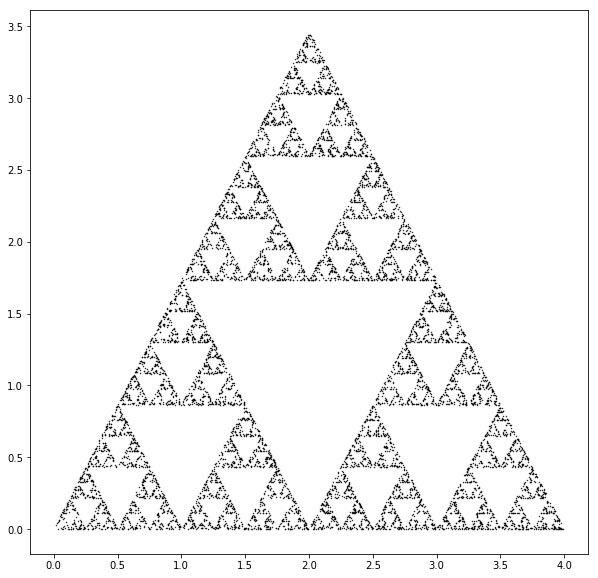

In [3]:
# Test image generation with Sierpinski Triangle

def prepare_triangle(number_of_points=10000):
    L = 0.5
    functions = [1, 2, 3]
    triangle = []
    x = 0.1
    y = 0.1
    for i in range(0, number_of_points):
        choice = np.random.choice(functions)
        nx = L * x
        ny = L * y
        if choice == 1:
            triangle.append([nx, ny])
        elif choice == 2:
            nx = nx + 2
            triangle.append([nx, ny])
        else:
            nx = nx + 1
            ny = ny + np.sqrt(3)
            triangle.append([nx, ny])
        x = nx
        y = ny
    return np.asarray(triangle)

scatter_triangle = prepare_triangle()
plt.figure(figsize=(10,10))
plt.scatter(scatter_triangle[:, 0], scatter_triangle[:, 1], s=0.2, c='black')
plt.show()

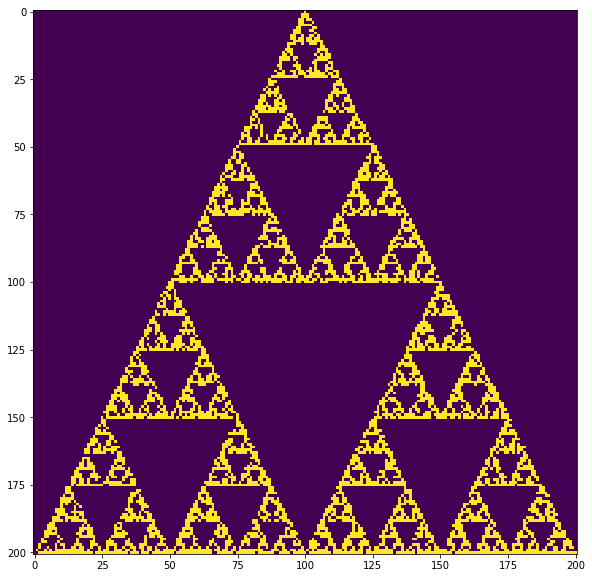

In [4]:
# test1 - image

triangle_image = calculate_dimension(scatter_triangle, 200)
plt.figure(figsize=(10,10))
plt.imshow(triangle_image)
plt.show()

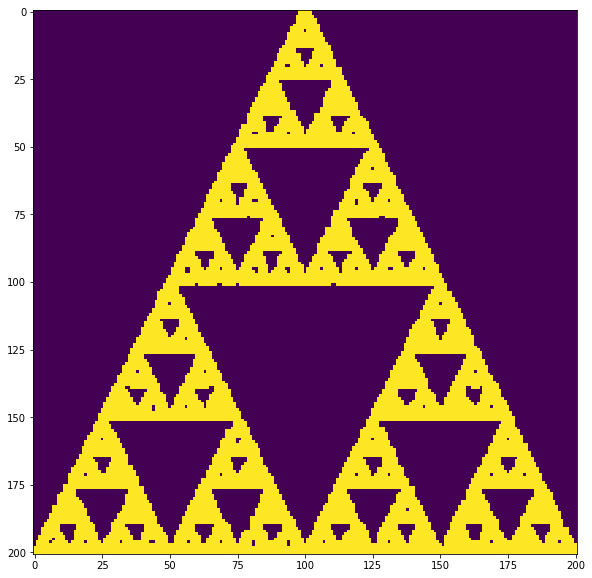

In [5]:
def calculate_dimension(array_of_points, normalization_value=100,
                       dilate=False):
    
    # 1. Create image
    
    # 1.1 Normalize values
    # 1.1.1 Get mins
    min_x = np.min(array_of_points[:, 0])
    min_y = np.min(array_of_points[:, 1])
    
    # 1.1.2 Start from (0, 0)
    fromzero_array = np.copy(array_of_points)
    fromzero_array[:, 0] = fromzero_array[:, 0] + min_x
    fromzero_array[:, 1] = fromzero_array[:, 1] + min_y
    
    # 1.1.3 Normalize values
    norm_val = normalization_value
    fromzero_array[:, 0] = (fromzero_array[:, 0] / np.max(fromzero_array[:, 0]))
    fromzero_array[:, 1] = (fromzero_array[:, 1] / np.max(fromzero_array[:, 1]))
    
    fromzero_array = (fromzero_array * norm_val).astype(int)

    # 2. Create image matrix
    size_y = np.max(fromzero_array[:, 1])
    size_x = np.max(fromzero_array[:, 0])
    image = np.zeros((size_y + 1, size_x + 1))
    
    for i in range(0, len(fromzero_array)):
        image[size_y - fromzero_array[i, 1], fromzero_array[i, 0]] = 1
        
    # 3. Optional: Dilate image
    
    if dilate == True:
        structuring_matrix = np.ones((3, 3), dtype=np.bool)
        dilated_mtx = convolve(image, structuring_matrix)
        dilated_mtx[dilated_mtx > 0] = 1
        
    return dilated_mtx

# test2 - dilated image

triangle_image = calculate_dimension(scatter_triangle, 200, dilate=True)
plt.figure(figsize=(10,10))
plt.imshow(triangle_image)
plt.show()

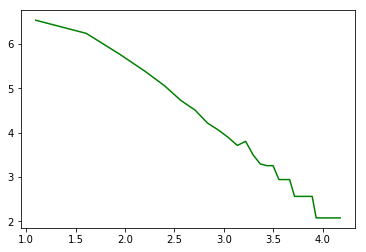

In [6]:
def calculate_dimension(array_of_points, normalization_value=100,
                       dilate=False):
    
    # 1. Create image
    
    # 1.1 Normalize values
    # 1.1.1 Get mins
    min_x = np.min(array_of_points[:, 0])
    min_y = np.min(array_of_points[:, 1])
    
    # 1.1.2 Start from (0, 0)
    fromzero_array = np.copy(array_of_points)
    fromzero_array[:, 0] = fromzero_array[:, 0] + min_x
    fromzero_array[:, 1] = fromzero_array[:, 1] + min_y
    
    # 1.1.3 Normalize values
    norm_val = normalization_value
    fromzero_array[:, 0] = (fromzero_array[:, 0] / np.max(fromzero_array[:, 0]))
    fromzero_array[:, 1] = (fromzero_array[:, 1] / np.max(fromzero_array[:, 1]))
    
    fromzero_array = (fromzero_array * norm_val).astype(int)

    # 2. Create image matrix
    size_y = np.max(fromzero_array[:, 1])
    size_x = np.max(fromzero_array[:, 0])
    image = np.zeros((size_y + 1, size_x + 1))
    
    for i in range(0, len(fromzero_array)):
        image[size_y - fromzero_array[i, 1], fromzero_array[i, 0]] = 1
        
    # 3. Optional: Dilate image
    
    if dilate == True:
        structuring_matrix = np.ones((3, 3), dtype=np.bool)
        image = convolve(image, structuring_matrix)
        image[image > 0] = 1
        
    # 4. Box preparation
    
    box_length = np.arange(3, normalization_value/3, 2, dtype=int)
    
    # 5. Counting edges (number of boxes which covers fractal image). Takes into account
    # a box which covers heterogeneous areas: 
    # https://en.wikipedia.org/wiki/Minkowski%E2%80%93Bouligand_dimension
    shape_arr = []
    for border in box_length:
        counter = 0
        i_arr = np.arange(0, image.shape[0], border)

        j_arr = np.arange(0, image.shape[1], border)
            
        for i in i_arr:
            if (i + border) > image.shape[0]:
                pass
            else:
                for j in j_arr:
                    if (j + border) > image.shape[1]:
                        pass
                    else:
                        test = np.mean(image[i:i+border, j:j+border])
                        if (test != 1) and (test != 0):
                            counter = counter + 1
        shape_arr.append([border, counter])
    shape_arr = np.asarray(shape_arr)     
        
    return shape_arr

# test 3 - boxes calculation

triangle_image_boxes = calculate_dimension(scatter_triangle, 200, dilate=True)
plt.figure()
plt.plot(np.log(triangle_image_boxes[:, 0]), np.log(triangle_image_boxes[:, 1]), c='green')
plt.show()

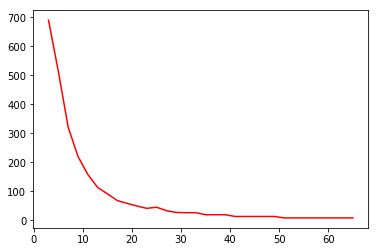

In [7]:
triangle_image_boxes = calculate_dimension(scatter_triangle, 200, dilate=True)
plt.figure()
plt.plot(triangle_image_boxes[:, 0], triangle_image_boxes[:, 1], c='red')
plt.show()

-1.65009260301 8.86853939841


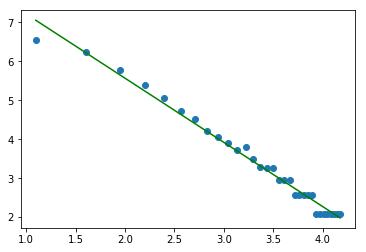

In [8]:
def calculate_dimension(array_of_points, normalization_value=100,
                       dilate=False):
    
    # 1. Create image
    
    # 1.1 Normalize values
    # 1.1.1 Get mins
    min_x = np.min(array_of_points[:, 0])
    min_y = np.min(array_of_points[:, 1])
    
    # 1.1.2 Start from (0, 0)
    fromzero_array = np.copy(array_of_points)
    fromzero_array[:, 0] = fromzero_array[:, 0] + min_x
    fromzero_array[:, 1] = fromzero_array[:, 1] + min_y
    
    # 1.1.3 Normalize values
    norm_val = normalization_value
    fromzero_array[:, 0] = (fromzero_array[:, 0] / np.max(fromzero_array[:, 0]))
    fromzero_array[:, 1] = (fromzero_array[:, 1] / np.max(fromzero_array[:, 1]))
    
    fromzero_array = (fromzero_array * norm_val).astype(int)

    # 2. Create image matrix
    size_y = np.max(fromzero_array[:, 1])
    size_x = np.max(fromzero_array[:, 0])
    image = np.zeros((size_y + 1, size_x + 1))
    
    for i in range(0, len(fromzero_array)):
        image[size_y - fromzero_array[i, 1], fromzero_array[i, 0]] = 1
        
    # 3. Optional: Dilate image
    
    if dilate == True:
        structuring_matrix = np.ones((3, 3), dtype=np.bool)
        image = convolve(image, structuring_matrix)
        image[image > 0] = 1
        
    # 4. Box preparation
    
    box_length = np.arange(3, normalization_value/3, 2, dtype=int)
    
    # 5. Counting edges (number of boxes which covers fractal image). Takes into account
    # a box which covers heterogeneous areas: 
    # https://en.wikipedia.org/wiki/Minkowski%E2%80%93Bouligand_dimension
    shape_arr = []
    for border in box_length:
        counter = 0
        i_arr = np.arange(0, image.shape[0], border)

        j_arr = np.arange(0, image.shape[1], border)
            
        for i in i_arr:
            if (i + border) > image.shape[0]:
                pass
            else:
                for j in j_arr:
                    if (j + border) > image.shape[1]:
                        pass
                    else:
                        test = np.mean(image[i:i+border, j:j+border])
                        if (test != 1) and (test != 0):
                            counter = counter + 1
        shape_arr.append([border, counter])
        
    shape_arr = np.asarray(shape_arr)
    shape_arr = np.log(shape_arr)
    x = shape_arr[:, 0]
    A = np.vstack([x, np.ones(len(x))]).T
    y = shape_arr[:, 1]
    m, c = np.linalg.lstsq(A, y)[0]
    print(m, c)
        
    return shape_arr, [m, c]

# test 4 - linear function fit

triangle_image_boxes = calculate_dimension(scatter_triangle, 200, dilate=True)
m = triangle_image_boxes[1][0]
c = triangle_image_boxes[1][1]
plt.figure()
plt.plot(triangle_image_boxes[0][:, 0], triangle_image_boxes[0][:, 1], 'o', label='Base points')
plt.plot(triangle_image_boxes[0][:, 0],
         c + m * triangle_image_boxes[0][:, 0], c='green', label='Derived function')
plt.show()

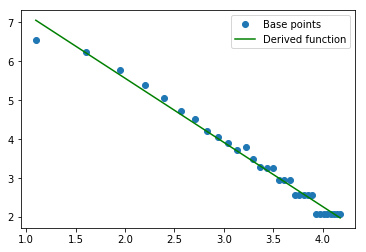

Fractal Dimension calculated directly from the data is: 1.5287425141
Fractal Dimension calculated from linear function derived from data is: 1.65009260301
Sierpinski Triangle fractal dimension is close to 1.58


In [9]:
def calculate_dimension(array_of_points, normalization_value=100,
                       dilate=False,
                       visualize = True):
    
    # 1. Create image
    
    # 1.1 Normalize values
    # 1.1.1 Get mins
    min_x = np.min(array_of_points[:, 0])
    min_y = np.min(array_of_points[:, 1])
    
    # 1.1.2 Start from (0, 0)
    fromzero_array = np.copy(array_of_points)
    fromzero_array[:, 0] = fromzero_array[:, 0] + np.abs(min_x)
    fromzero_array[:, 1] = fromzero_array[:, 1] + np.abs(min_y)
    
    # 1.1.3 Normalize values
    norm_val = normalization_value
    fromzero_array[:, 0] = (fromzero_array[:, 0] / np.max(fromzero_array[:, 0]))
    fromzero_array[:, 1] = (fromzero_array[:, 1] / np.max(fromzero_array[:, 1]))
    
    fromzero_array = (fromzero_array * norm_val).astype(int)

    # 2. Create image matrix
    size_y = np.max(fromzero_array[:, 1])
    size_x = np.max(fromzero_array[:, 0])
    image = np.zeros((size_y + 1, size_x + 1))
    
    for i in range(0, len(fromzero_array)):
        image[size_y - fromzero_array[i, 1], fromzero_array[i, 0]] = 1
        
    # 3. Optional: Dilate image
    
    if dilate == True:
        structuring_matrix = np.ones((3, 3), dtype=np.bool)
        image = convolve(image, structuring_matrix)
        image[image > 0] = 1
        
    # 4. Box preparation
    
    box_length = np.arange(3, normalization_value/3, 2, dtype=int)
    
    # 5. Counting edges (number of boxes which covers fractal image). Takes into account
    # a box which covers heterogeneous areas: 
    # https://en.wikipedia.org/wiki/Minkowski%E2%80%93Bouligand_dimension
    shape_arr = []
    for border in box_length:
        counter = 0
        i_arr = np.arange(0, image.shape[0], border)

        j_arr = np.arange(0, image.shape[1], border)
            
        for i in i_arr:
            if (i + border) > image.shape[0]:
                pass
            else:
                for j in j_arr:
                    if (j + border) > image.shape[1]:
                        pass
                    else:
                        test = np.mean(image[i:i+border, j:j+border])
                        if (test != 1) and (test != 0):
                            counter = counter + 1
        shape_arr.append([border, counter])
        
    shape_arr = np.asarray(shape_arr)
    shape_arr = np.log(shape_arr)
    
    # 6. Calculate fitted linear function
    x = shape_arr[:, 0]
    A = np.vstack([x, np.ones(len(x))]).T
    y = shape_arr[:, 1]
    m, c = np.linalg.lstsq(A, y)[0]
    
    # 7. Calculate slope - fractal dimension
    dx = np.diff(x)
    dy = np.diff(y)
    lin_dy = np.diff(x * m + c)
    lin_slope = lin_dy/dx
    lin_slope = np.abs(np.mean(lin_slope))
    slope = dy/dx
    slope = np.abs(np.mean(slope))
    
    # 8. Optional - visualize data
    if visualize == True:
        plt.figure()
        plt.plot(x, y, 'o', label='Base points')
        plt.plot(x, x * m + c, c='green', label='Derived function')
        plt.legend()
        plt.show()

    return slope, lin_slope

fractal_dimension = calculate_dimension(scatter_triangle, 200, dilate=True)
print('Fractal Dimension calculated directly from the data is:', fractal_dimension[0])
print('Fractal Dimension calculated from linear function derived from data is:',
      fractal_dimension[1])
print('Sierpinski Triangle fractal dimension is close to 1.58')

##### Test of different cases

- Other fractals: von Koch's star, Sierpinski Carpet and Snowflake
- Fractals with and without dilation
- Fractals with dimension 200, 500 and 1000

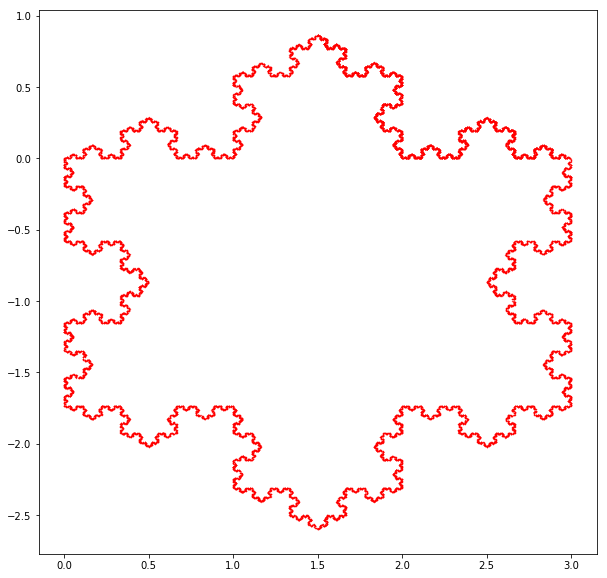

In [10]:
# Star

def generate_von_koch_star(x, y, iterations):
    z = complex(x, y)
    points_list = [[x, y]]
    const_var_a = np.exp((np.pi * 1j) / 6) / np.sqrt(3)
    const_var_b = np.exp(-(np.pi * 1j) / 6) / np.sqrt(3)
    const_var_c = np.exp((np.pi * 1j) / 6) * np.sqrt(3)
    
    star_const_a = np.exp(-(np.pi * 1j) / 3)
    star_const_b = np.exp((np.pi * 1j) / 3)
    
    for i in range(0, iterations):
        test = np.random.choice(['w1', 'w2'])
        if test == 'w1':
            z = const_var_a * z.conjugate()
        elif test == 'w2':
            z = const_var_b * z.conjugate() + const_var_c
            points_list.append([z.real, z.imag])
        else:
            raise ValueError('Too much equations?!')
        z_s_1 = z.conjugate() * star_const_a
        z_s_2 = z.conjugate() * star_const_b + 3 * star_const_a
        points_list.append([z.real, z.imag])
        points_list.append([z_s_1.real, z_s_1.imag])
        points_list.append([z_s_2.real, z_s_2.imag])
    return np.asarray(points_list)

star = generate_von_koch_star(x=0, y=0, iterations=10000)
plt.figure(figsize=(10,10))
plt.scatter(star[:, 0], star[:, 1], s=0.1, c='r')

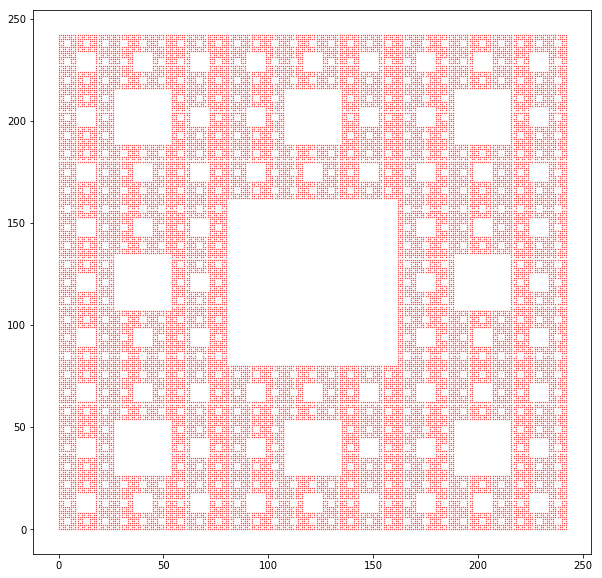

In [11]:
# Carpet

class SierpinskiCarpet:
    
    def __init__(self, number_of_iterations=3):
        # Calculate size of np.array
        self.steps = number_of_iterations
        self.size = 3**number_of_iterations
        self.canvas = []
        
    def create_canvas(self):
        self.canvas = np.ones((self.size, self.size), dtype=int)
    
    def show_canvas(self):
        fig = plt.figure(figsize=(10,10))
        plt.imshow(self.canvas, cmap='gray')
        plt.show()
        
    @staticmethod
    def find_satellite_points(point, distance):
        # find new distance and store it
        if distance == 1:
            new_distance = 0
        else:
            new_distance = int((3**(distance-1)) / 2)
        
        # find all satellite points
        d = 3**distance
        list_of_points = []
        for p in point:
            pA = [p[0] - d, p[0], p[0] + d]
            pB = [p[1] - d, p[1], p[1] + d]
            for x in pA:
                for y in pB:
                    if [x, y] != [p[0], p[1]]:
                        list_of_points.append([x, y])
        list_of_points.append(new_distance)
        return list_of_points
    
    @staticmethod
    def prepare_neighbours(pts, dist):
        full_array = []
        for p in pts:
            for i in range(p[0] - dist, p[0] + dist + 1):
                for j in range(p[1] - dist, p[1] + dist + 1):
                    full_array.append([i, j])
        return full_array
        
    def prepare_points(self):
        # The idea behind algorithm is explained after the code - it will be not clear if I write it here
        i = self.steps
        
        # Define first point
        middle = int(np.ceil(self.size/2))
        first_point = [middle, middle]
        first_n_distance = int((3**(i-1)) / 2)
        points = {i: [first_point, first_n_distance]}
        
        # Define the rest of points
        x = points[i]
        i = i - 1
        while i > 0:
            x = self.find_satellite_points(x[:-1], i)
            points[i] = x
            i = i - 1
        return points
        
    def fill_matrix(self, points_dict):
        for key in points_dict:
            array_of_vals = points_dict[key][:-1]
            neighbours = points_dict[key][-1]
            if neighbours > 0:
                array_of_vals = self.prepare_neighbours(array_of_vals, neighbours)
            for val in array_of_vals:
                self.canvas[val[0]-1, val[1]-1] = 0
        
    def create_carpet(self):
        # The first part is to prepare dict with points to fill
        filled_points = self.prepare_points()
        # The second part is to fill matrix of ones by zeros
        self.fill_matrix(filled_points)
        return filled_points
    
my_carpet = SierpinskiCarpet(5)
my_carpet.create_canvas()
my_carpet.create_carpet()
f = my_carpet.canvas
carpet_pts = np.where(f > 0)
carpet = np.dstack((carpet_pts[0], carpet_pts[1]))[0]

plt.figure(figsize=(10,10))
plt.scatter(carpet[:, 0], carpet[:, 1], s=0.1, c='r')

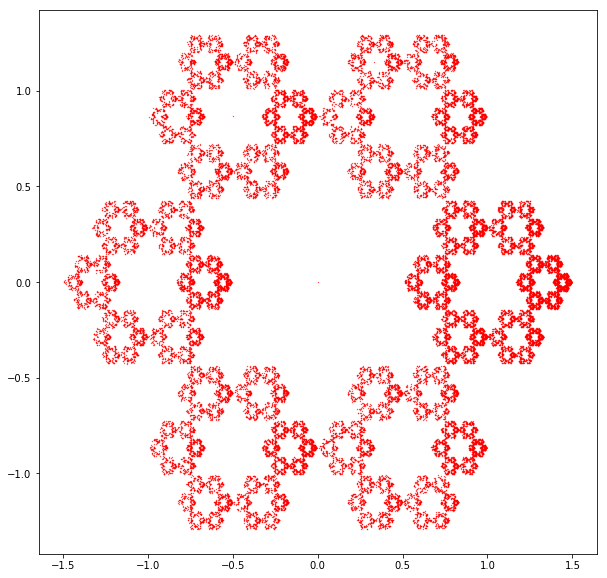

In [12]:
# Snowflake

class Snowflake:
    
    def __init__(self, x, y, iterations):
        self.z = complex(x, y)
        self.points_list = [[x, y]]
        self.x = x
        self.y = y
        self.iters = iterations
        self.star_const_a = np.exp(-(np.pi * 1j) / 3)
        self.star_const_b = np.exp((np.pi * 1j) / 3)
        self.c = {
            'w1': 1,
            'w2': 2,
            'w3': 3,
            'w4': 4,
            'w5': 5,
            'w6': 6,
            'w7': 0
        }

    def _calculate_w(self):
        key = np.random.choice(list(self.c.keys()))
        w = 0.33 * self.z + np.exp((1j * np.pi * self.c[key]) / 3)
        return w
    
    def build_snowflake(self):
        
        for i in range(0, self.iters):
            z = self._calculate_w()
            self.points_list.append([z.real, z.imag])
            self.z = z
        return np.asarray(self.points_list)
    
snowflake = Snowflake(0, 0, 50000)
snowflake_data = snowflake.build_snowflake()
plt.figure(figsize=(10,10))
plt.scatter(snowflake_data[:, 0], snowflake_data[:, 1], s=0.1, c='r')

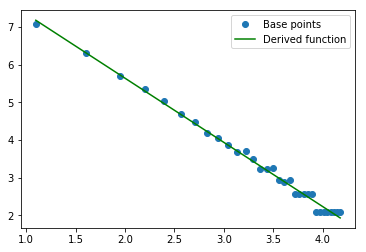

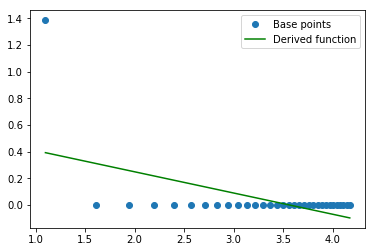

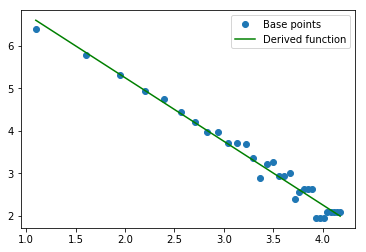

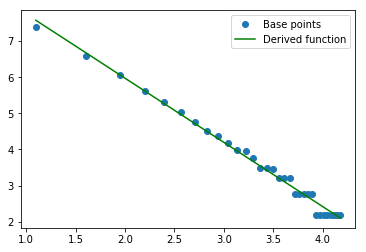

Base  fractal dimension of  Sierpinski Triangle is  1.58
Derived  fractal dimension of  Sierpinski Triangle is  1.5466538292 (calculated directly from the data)
Derived fractal dimension of  Sierpinski Triangle is  1.70640944316 (calculated from linear regression of the data)
Base  fractal dimension of  von Koch Star is  1.26
Derived  fractal dimension of  von Koch Star is  1.39821015724 (calculated directly from the data)
Derived fractal dimension of  von Koch Star is  1.50231687055 (calculated from linear regression of the data)
Base  fractal dimension of  Sierpinski Carpet is  1.89
Derived  fractal dimension of  Sierpinski Carpet is  0.0875429321843 (calculated directly from the data)
Derived fractal dimension of  Sierpinski Carpet is  0.159050655063 (calculated from linear regression of the data)
Base  fractal dimension of  Snowflake is  1.77
Derived  fractal dimension of  Snowflake is  1.67430331998 (calculated directly from the data)
Derived fractal dimension of  Snowflake is  1.

In [13]:
# Case 1: Fractal Dimension (FD) of von Koch Star, Sierpinski Carpet and Snowflake

fd = 'fractal dimension of '
ks = 'von Koch Star is '
sc = 'Sierpinski Carpet is '
st = 'Sierpinski Triangle is '
sf = 'Snowflake is '
dfd = '(calculated directly from the data)'
dfr = '(calculated from linear regression of the data)'

triangle_dimension = calculate_dimension(scatter_triangle, 200, dilate=False)
carpet_dimension = calculate_dimension(carpet, 200, dilate=False)
star_dimension = calculate_dimension(star, 200, dilate=False)
snowflake_dimension = calculate_dimension(snowflake_data, 200, dilate=False)

print('Base ', fd, st, 1.58)
print('Derived ', fd, st, triangle_dimension[0], dfd)
print('Derived', fd, st, triangle_dimension[1], dfr)
print('Base ', fd, ks, 1.26)
print('Derived ', fd, ks, star_dimension[0], dfd)
print('Derived', fd, ks, star_dimension[1], dfr)
print('Base ', fd, sc, 1.89)
print('Derived ', fd, sc, carpet_dimension[0], dfd)
print('Derived', fd, sc, carpet_dimension[1], dfr)
print('Base ', fd, sf, 1.77)
print('Derived ', fd, sf, snowflake_dimension[0], dfd)
print('Derived', fd, sf, snowflake_dimension[1], dfr)

##### First problem:

-> Outliers. To fix it i will delete the first and the last point from the data

In [14]:
def calculate_dimension(array_of_points, normalization_value=100,
                       dilate=False,
                       visualize = True):
    
    # 1. Create image
    
    # 1.1 Normalize values
    # 1.1.1 Get mins
    min_x = np.min(array_of_points[:, 0])
    min_y = np.min(array_of_points[:, 1])
    
    # 1.1.2 Start from (0, 0)
    fromzero_array = np.copy(array_of_points)
    fromzero_array[:, 0] = fromzero_array[:, 0] + np.abs(min_x)
    fromzero_array[:, 1] = fromzero_array[:, 1] + np.abs(min_y)
    
    # 1.1.3 Normalize values
    norm_val = normalization_value
    fromzero_array[:, 0] = (fromzero_array[:, 0] / np.max(fromzero_array[:, 0]))
    fromzero_array[:, 1] = (fromzero_array[:, 1] / np.max(fromzero_array[:, 1]))
    
    fromzero_array = (fromzero_array * norm_val).astype(int)

    # 2. Create image matrix
    size_y = np.max(fromzero_array[:, 1])
    size_x = np.max(fromzero_array[:, 0])
    image = np.zeros((size_y + 1, size_x + 1))
    
    for i in range(0, len(fromzero_array)):
        image[size_y - fromzero_array[i, 1], fromzero_array[i, 0]] = 1
        
    # 3. Optional: Dilate image
    
    if dilate == True:
        structuring_matrix = np.ones((3, 3), dtype=np.bool)
        image = convolve(image, structuring_matrix)
        image[image > 0] = 1
        
    # 4. Box preparation
    
    box_length = np.arange(3, normalization_value/3, 2, dtype=int)
    
    # 5. Counting edges (number of boxes which covers fractal image). Takes into account
    # a box which covers heterogeneous areas: 
    # https://en.wikipedia.org/wiki/Minkowski%E2%80%93Bouligand_dimension
    shape_arr = []
    for border in box_length:
        counter = 0
        i_arr = np.arange(0, image.shape[0], border)

        j_arr = np.arange(0, image.shape[1], border)
            
        for i in i_arr:
            if (i + border) > image.shape[0]:
                pass
            else:
                for j in j_arr:
                    if (j + border) > image.shape[1]:
                        pass
                    else:
                        test = np.mean(image[i:i+border, j:j+border])
                        if (test != 1) and (test != 0):
                            counter = counter + 1
        shape_arr.append([border, counter])
        
    shape_arr = np.asarray(shape_arr)
    shape_arr = np.log(shape_arr)
    
    # 6. Calculate fitted linear function
    x = shape_arr[1:-1, 0]
    A = np.vstack([x, np.ones(len(x))]).T
    y = shape_arr[1:-1, 1]
    m, c = np.linalg.lstsq(A, y)[0]
    
    # 7. Calculate slope - fractal dimension
    dx = np.diff(x)
    dy = np.diff(y)
    lin_dy = np.diff(x * m + c)
    lin_slope = lin_dy/dx
    lin_slope = np.abs(np.mean(lin_slope))
    slope = dy/dx
    slope = np.abs(np.mean(slope))
    
    # 8. Optional - visualize data
    if visualize == True:
        plt.figure()
        plt.plot(x, y, 'o', label='Base points')
        plt.plot(x, x * m + c, c='green', label='Derived function')
        plt.legend()
        plt.show()

    return slope, lin_slope

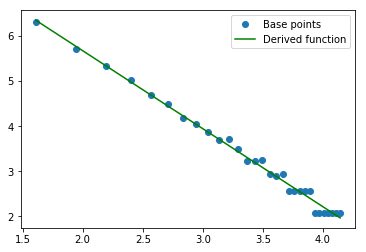

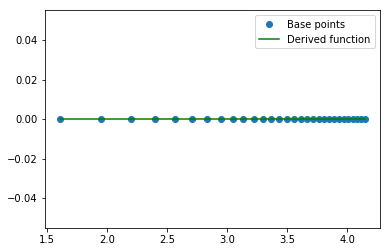

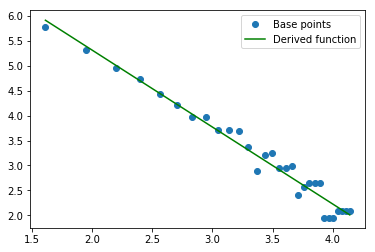

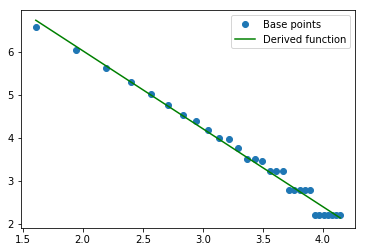

Base  fractal dimension of  Sierpinski Triangle is  1.58
Derived  fractal dimension of  Sierpinski Triangle is  1.60096503532 (calculated directly from the data)
Derived fractal dimension of  Sierpinski Triangle is  1.73218670407 (calculated from linear regression of the data)
Base  fractal dimension of  von Koch Star is  1.26
Derived  fractal dimension of  von Koch Star is  1.45345884239 (calculated directly from the data)
Derived fractal dimension of  von Koch Star is  1.54310321948 (calculated from linear regression of the data)
Base  fractal dimension of  Sierpinski Carpet is  1.89
Derived  fractal dimension of  Sierpinski Carpet is  0.0 (calculated directly from the data)
Derived fractal dimension of  Sierpinski Carpet is  0.0 (calculated from linear regression of the data)
Base  fractal dimension of  Snowflake is  1.77
Derived  fractal dimension of  Snowflake is  1.73596777364 (calculated directly from the data)
Derived fractal dimension of  Snowflake is  1.81808420348 (calculate

In [15]:
# Case 1b: Fractal Dimension (FD) of von Koch Star, Sierpinski Carpet and Snowflake
# WITHOUT OUTLIERS

fd = 'fractal dimension of '
ks = 'von Koch Star is '
sc = 'Sierpinski Carpet is '
st = 'Sierpinski Triangle is '
sf = 'Snowflake is '
dfd = '(calculated directly from the data)'
dfr = '(calculated from linear regression of the data)'

triangle_dimension = calculate_dimension(scatter_triangle, 200, dilate=False)
carpet_dimension = calculate_dimension(carpet, 200, dilate=False)
star_dimension = calculate_dimension(star, 200, dilate=False)
snowflake_dimension = calculate_dimension(snowflake_data, 200, dilate=False)

print('Base ', fd, st, 1.58)
print('Derived ', fd, st, triangle_dimension[0], dfd)
print('Derived', fd, st, triangle_dimension[1], dfr)
print('Base ', fd, ks, 1.26)
print('Derived ', fd, ks, star_dimension[0], dfd)
print('Derived', fd, ks, star_dimension[1], dfr)
print('Base ', fd, sc, 1.89)
print('Derived ', fd, sc, carpet_dimension[0], dfd)
print('Derived', fd, sc, carpet_dimension[1], dfr)
print('Base ', fd, sf, 1.77)
print('Derived ', fd, sf, snowflake_dimension[0], dfd)
print('Derived', fd, sf, snowflake_dimension[1], dfr)

It's still not working as expected, so I will prepare a correct method to remove outliers and check later if dilation changes something. And I think that these outliers are not so bad :) More important is to remove values too close to zero... And change the support of box-counting algorithm (to smaller boxes).

In [16]:
def calculate_dimension(array_of_points,
                        normalization_value=100,
                        dilate=False,
                        visualize = True):
    
    # 1. Create image
    
    # 1.1 Normalize values
    # 1.1.1 Get mins
    min_x = np.min(array_of_points[:, 0])
    min_y = np.min(array_of_points[:, 1])
    
    # 1.1.2 Start from (0, 0)
    fromzero_array = np.copy(array_of_points)
    fromzero_array[:, 0] = fromzero_array[:, 0] + np.abs(min_x)
    fromzero_array[:, 1] = fromzero_array[:, 1] + np.abs(min_y)
    
    # 1.1.3 Normalize values
    norm_val = normalization_value
    fromzero_array[:, 0] = (fromzero_array[:, 0] / np.max(fromzero_array[:, 0]))
    fromzero_array[:, 1] = (fromzero_array[:, 1] / np.max(fromzero_array[:, 1]))
    
    fromzero_array = (fromzero_array * norm_val).astype(int)

    # 2. Create image matrix
    size_y = np.max(fromzero_array[:, 1])
    size_x = np.max(fromzero_array[:, 0])
    image = np.zeros((size_y + 1, size_x + 1))
    
    for i in range(0, len(fromzero_array)):
        image[size_y - fromzero_array[i, 1], fromzero_array[i, 0]] = 1
        
    # 3. Optional: Dilate image
    
    if dilate == True:
        structuring_matrix = np.ones((3, 3), dtype=np.bool)
        image = convolve(image, structuring_matrix)
        image[image > 0] = 1
        
    # 4. Box preparation
    
    box_length = np.arange(2, normalization_value/3, 1, dtype=int)
    
    # 5. Counting edges (number of boxes which covers fractal image). Takes into account
    # a box which covers heterogeneous areas: 
    # https://en.wikipedia.org/wiki/Minkowski%E2%80%93Bouligand_dimension
    shape_arr = []
    for border in box_length:
        counter = 0
        i_arr = np.arange(0, image.shape[0], border)

        j_arr = np.arange(0, image.shape[1], border)
            
        for i in i_arr:
            if (i + border) > image.shape[0]:
                pass
            else:
                for j in j_arr:
                    if (j + border) > image.shape[1]:
                        pass
                    else:
                        test = np.mean(image[i:i+border, j:j+border])
                        if (test != 1) and (test != 0):
                            counter = counter + 1
        shape_arr.append([border, counter])
        
    shape_arr = np.asarray(shape_arr)
    shape_arr = np.log(shape_arr)
    
    # 6. Calculate fitted linear function
    x = shape_arr[:, 0]
    A = np.vstack([x, np.ones(len(x))]).T
    y = shape_arr[:, 1]
    m, c = np.linalg.lstsq(A, y)[0]
    
    # 7. Calculate slope - fractal dimension
    dx = np.diff(x)
    dy = np.diff(y)
    lin_dy = np.diff(x * m + c)
    lin_slope = lin_dy/dx
    lin_slope = np.abs(np.mean(lin_slope))
    slope = dy/dx
    slope = np.abs(np.mean(slope))
    
    # 8. Optional - visualize data
    if visualize == True:
        plt.figure()
        plt.plot(x, y, 'o', label='Base points')
        plt.plot(x, x * m + c, c='green', label='Derived function')
        plt.legend()
        plt.show()

    return slope, lin_slope

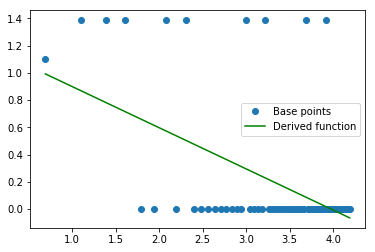

Base  fractal dimension of  Sierpinski Carpet is  1.89
Derived  fractal dimension of  Sierpinski Carpet is  0.237740528431 (calculated directly from the data)
Derived fractal dimension of  Sierpinski Carpet is  0.302276280919 (calculated from linear regression of the data)


In [21]:
# Case 1c: Fractal Dimension (FD) of Sierpinski Carpet
# WITH OUTLIERS and WITH CHANGED BOX SIZE (from 2x2 to 1/3rd of image size with step of 1 pixel) and WITH DILATION

carpet_dimension = calculate_dimension(carpet, 200, dilate=True)

print('Base ', fd, sc, 1.89)
print('Derived ', fd, sc, carpet_dimension[0], dfd)
print('Derived', fd, sc, carpet_dimension[1], dfr)

In [30]:
def calculate_dimension(array_of_points,
                        normalization_value=100,
                        dilate=False,
                        visualize = True):
    
    # 1. Create image
    
    # 1.1 Normalize values
    # 1.1.1 Get mins
    min_x = np.min(array_of_points[:, 0])
    min_y = np.min(array_of_points[:, 1])
    
    # 1.1.2 Start from (0, 0)
    fromzero_array = np.copy(array_of_points)
    fromzero_array[:, 0] = fromzero_array[:, 0] + np.abs(min_x)
    fromzero_array[:, 1] = fromzero_array[:, 1] + np.abs(min_y)
    
    # 1.1.3 Normalize values
    norm_val = normalization_value
    fromzero_array[:, 0] = (fromzero_array[:, 0] / np.max(fromzero_array[:, 0]))
    fromzero_array[:, 1] = (fromzero_array[:, 1] / np.max(fromzero_array[:, 1]))
    
    fromzero_array = (fromzero_array * norm_val).astype(int)

    # 2. Create image matrix
    size_y = np.max(fromzero_array[:, 1])
    size_x = np.max(fromzero_array[:, 0])
    image = np.zeros((size_y + 1, size_x + 1))
    
    for i in range(0, len(fromzero_array)):
        image[size_y - fromzero_array[i, 1], fromzero_array[i, 0]] = 1
        
    # 3. Optional: Dilate image
    
    if dilate == True:
        structuring_matrix = np.ones((3, 3), dtype=np.bool)
        image = convolve(image, structuring_matrix)
        image[image > 0] = 1
        
    # 4. Box preparation
    
    box_length = np.arange(2, normalization_value/3, 1, dtype=int)
    
    # 5. Counting edges (number of boxes which covers fractal image). Takes into account
    # a box which covers heterogeneous areas: 
    # https://en.wikipedia.org/wiki/Minkowski%E2%80%93Bouligand_dimension
    shape_arr = []
    for border in box_length:
        counter = 0
        i_arr = np.arange(0, image.shape[0], border)

        j_arr = np.arange(0, image.shape[1], border)
            
        for i in i_arr:
            if (i + border) > image.shape[0]:
                pass
            else:
                for j in j_arr:
                    if (j + border) > image.shape[1]:
                        pass
                    else:
                        test = np.mean(image[i:i+border, j:j+border])
                        if (test != 1) and (test > 0.2):
                            counter = counter + 1
        if counter > 0:
            shape_arr.append([border, counter])
        
    shape_arr = np.asarray(shape_arr)
    shape_arr = np.log(shape_arr)
    
    # 6. Calculate fitted linear function
    x = shape_arr[:, 0]
    A = np.vstack([x, np.ones(len(x))]).T
    y = shape_arr[:, 1]
    m, c = np.linalg.lstsq(A, y)[0]
    
    # 7. Calculate slope - fractal dimension
    dx = np.diff(x)
    dy = np.diff(y)
    lin_dy = np.diff(x * m + c)
    lin_slope = lin_dy/dx
    lin_slope = np.abs(np.mean(lin_slope))
    slope = dy/dx
    slope = np.abs(np.mean(slope))
    
    # 8. Optional - visualize data
    if visualize == True:
        plt.figure()
        plt.plot(x, y, 'o', label='Base points')
        plt.plot(x, x * m + c, c='green', label='Derived function')
        plt.legend()
        plt.show()

    return slope, lin_slope

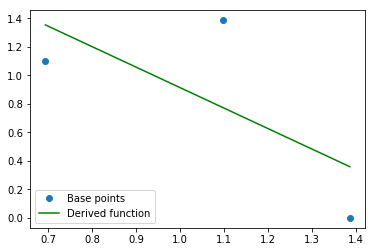

Base  fractal dimension of  Sierpinski Carpet is  1.89
Derived  fractal dimension of  Sierpinski Carpet is  2.05466519398 (calculated directly from the data)
Derived fractal dimension of  Sierpinski Carpet is  1.43436522142 (calculated from linear regression of the data)


In [31]:
# Case 1d: Fractal Dimension (FD) of Sierpinski Carpet
# WITH OUTLIERS and WITH CHANGED BOX SIZE (from 2x2 to 1/3rd of image size with step of 1 pixel) and WITH DILATION and

carpet_dimension = calculate_dimension(carpet, 200, dilate=True)

print('Base ', fd, sc, 1.89)
print('Derived ', fd, sc, carpet_dimension[0], dfd)
print('Derived', fd, sc, carpet_dimension[1], dfr)